# 2-5. 등급에 따른 메타 분석 [상위 1000 등]

## 라이브러리

In [1]:
import pandas as pd # 구조화된 데이터나 표 형식의 데이터 분석 및 조작을 위한 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns # Matplotlib을 기반으로 고급화된 시각화 기능을 제공하는 라이브러리
from matplotlib import font_manager, rc # Matplotlib에서 폰트를 설정하기 위한 라이브러리
import numpy as np # 다차원 배열을 처리하고 수치 해석을 위한 라이브러리
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 설정을 완료했다는 출력
print("Setup Complete")

Setup Complete


## 직업별 점유율 데이터 가져오기

In [2]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
meta_filepath = os.path.join(current_directory, '1000', './hs_meta.csv')

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드와 행,열 개수 확인
print(meta_data.shape)
meta_data.head()

(49, 5)


,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,48.6,4.9,5600
1,죽음의 기사,혈기 죽음의 기사,47.6,1.1,1200
2,죽음의 기사,Highlander Blood Death Knight,42.0,0.3,360
3,죽음의 기사,냉기 죽음의 기사,42.1,0.2,190
4,죽음의 기사,Rainbow Death Knight,22.4,0.1,110


## 직업 및 덱별 색상 지정

In [3]:
# 직업별 색깔 지정
hero_colors = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

In [4]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

## 직업별 덱 유형별 총 점유율 데이터 시각화를 위한 데이터 정제

In [5]:
# 직업별 총 점유율을 계산한 데이터프레임 생성
# 직업을 기준으로 그룹화하고 점유율의 값을 합하여 각 직업별 총 점유율을 계산
# reset_index() : 결과를 새로운 데이터프레임으로 변환하고, 총 점유율 순으로 정렬
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index().sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 Hero 열을 Categorical 변수로 변환
# tolist() : 위 데이터프레임에서 총 점유율 순으로 정렬한 Hero 열을 추출하고 리스트로 변환
# Categorical : 위 hero_order 리스트를 통해 시각화 시 정렬 순서를 지정
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱'열을 수정
# lambda : 각 행에 적용되는 익명 함수, apply 함수를 데이터프레임의 각 행에 적용
# 조건문을 사용하여 '기타'가 포함되어 있는지 확인하고, 있다면 덱 열 뒤에 직업을 추가
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 데이터 헤드와 행,열 개수 확인
print(deck_total.shape)
deck_total.head()

(49, 5)


,Hero,Deck,Winrate,Popular,Games
44,흑마법사,기타 흑마법사,50.4,0.6,670
39,흑마법사,Mining Warlock,44.1,0.5,590
40,흑마법사,하이랜더 흑마법사,41.8,0.3,320
41,흑마법사,타디우스 흑마법사,48.8,0.2,280
42,흑마법사,Sludge Warlock,35.3,0.2,230


## 1) 직업별 덱 유형별 점유율
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 상위 1000 등 유저
</pre>

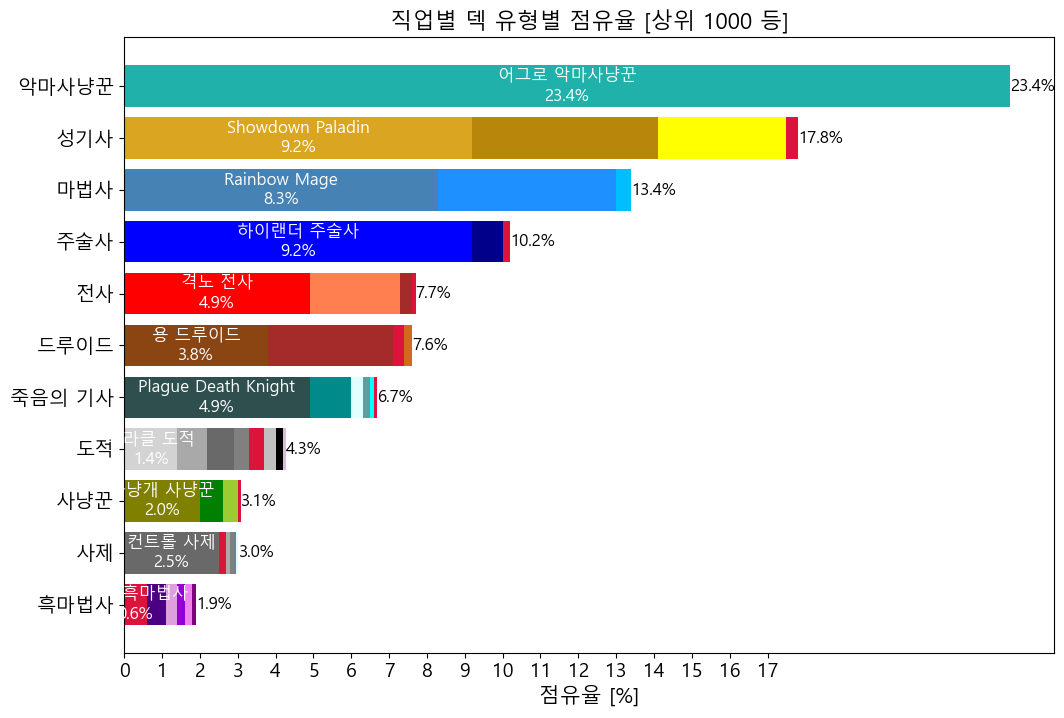

In [13]:
# 직업별로 덱 유형별 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# 그래프 사이즈
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
# unique : 각 덱의 이름을 가져오기
# enumerate : 인덱스 i와 덱의 이름 deck 가져오기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

# 직업별 가장 높은 점유율을 가진 덱 정보 가져오기
# lambda : 각 직업별로 가장 높은 점유율을 가진 덱에 대한 정보를 선택
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])

# 직업별 총 점유율 정보 가져오기
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
# iterrows : 각 행의 인덱스와 해당하는 데이터를 반복적으로 반환
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center', fontsize=12)

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center', fontsize=12)

# 타이틀 및 레이블 설정
plt.title("직업별 덱 유형별 점유율 [상위 1000 등]", fontsize=16)
plt.xlabel("점유율 [%]", fontsize =15)

# 축 설정
plt.xticks(range(0, 18), fontsize=14)
plt.yticks(fontsize=14)

# 범례 설정
plt.legend().set_visible(False)

# 그래프 출력
plt.show()

## 승률 통계 데이터 가져오기

In [9]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
matchup_filepath = os.path.join(current_directory, '1000', './hs_matchups.csv')

# 데이터 불러오기 (.csv 파일 읽기)
# index_col=0 : 첫번째 열을 행 인덱스로 사용하도록 지정
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

# 주어진 값에서 '%'를 제거하고 숫자로 변환하는 함수
def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환하고 반환
    try:
        return float(value.rstrip('%'))
    # 예외 처리 : NaN 반환
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)

# 데이터 헤드와 행,열 개수 확인
print(matchup_data.shape)
matchup_data.head()

(14, 14)


,어그로 악마사냥꾼,하이랜더 주술사,Showdown Paladin,Rainbow Mage,어그로 성기사,Plague Death Knight,격노 전사,Mining Mage,용 드루이드,하이랜더 성기사,하이랜더 드루이드,컨트롤 사제,컨트롤 전사,사냥개 사냥꾼
어그로 악마사냥꾼,NaN,48.78,43.01,57.87,55.10,60.71,50.04,58.07,47.82,54.60,65.53,50.48,46.82,52.12
하이랜더 주술사,51.21,NaN,55.94,48.69,48.56,36.17,56.15,47.29,56.50,66.13,58.22,58.09,47.36,55.22
Showdown Paladin,56.98,44.05,NaN,48.58,58.91,50.60,37.18,49.87,63.95,41.82,60.94,42.78,37.50,67.77
Rainbow Mage,42.12,51.30,51.41,NaN,51.82,56.64,42.78,57.30,48.67,60.47,46.24,61.57,51.48,50.00
어그로 성기사,44.89,51.43,41.08,48.17,NaN,55.50,42.51,51.33,64.58,46.82,66.66,45.45,52.88,62.61


## 2) 덱별 대전 통계
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 상위 1000 등 유저
</pre>

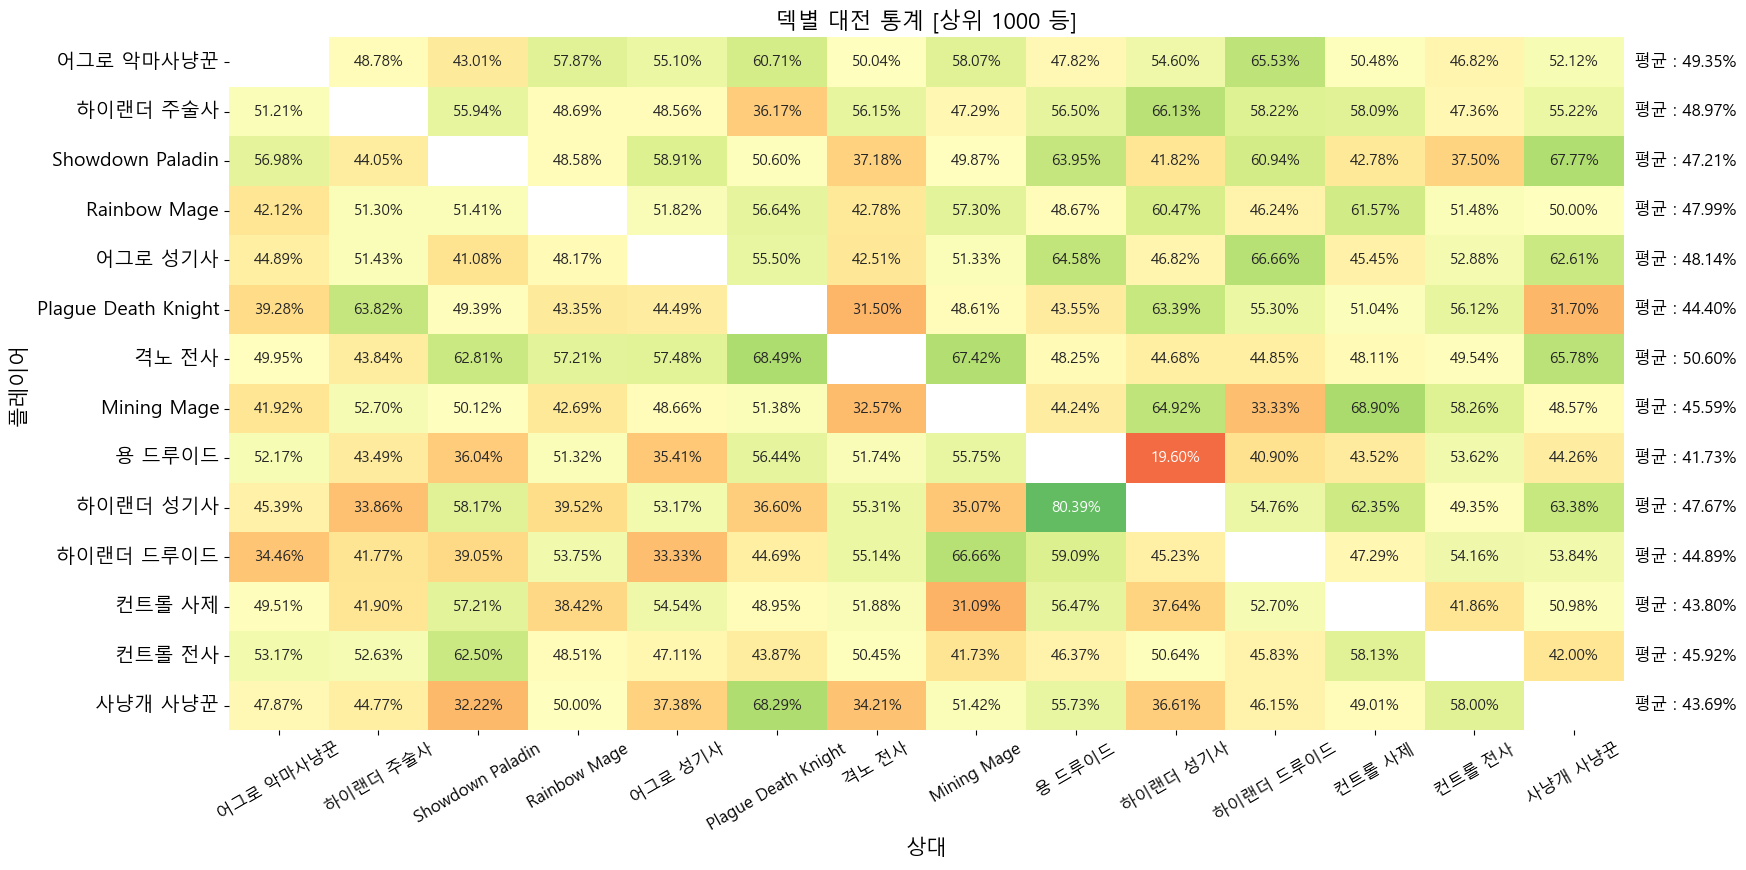

In [12]:
# 그래프 사이즈
plt.figure(figsize=(18, 9)) 

# 히트맵 그리기
heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 11}, cbar=False)

# 행별 열의 합의 평균값을 우측에 표시
# enumerate : 인덱스 i와 행의 이름 row_name 가져오기
for i, row_name in enumerate(matchup_data.index):
    # 각 행의 총합을 계산
    row_sum = matchup_data.loc[row_name].sum()
    # 각 행의 열의 합의 평균을 계산
    avg_value = row_sum / len(matchup_data.columns)
    # 평균값 표시
    heatmap.text(len(matchup_data.columns)+0.1, i + 0.5, f'평균 : {avg_value:.2f}', ha='left', va='center', fontsize=12, color='black')

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

# 타이틀 및 레이블 설정
plt.title("덱별 대전 통계 [상위 1000 등]", fontsize=16)
plt.xlabel("상대", fontsize=15)
plt.ylabel("플레이어", fontsize=15)

# 축 설정
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=14)

# 그래프 설정
plt.show()